In [ ]:
import pandas as pd
from google.colab import drive

# Load the dataset
drive.mount('/content/drive')

# Define the correct paths to your dataset
file_path = "/content/drive/MyDrive/all_energy_statistics.csv"

df = pd.read_csv(file_path)
df.head(100)  # Check the data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
...,...,...,...,...,...,...,...
95,Netherlands,Additives and Oxygenates - Exports,2005,"Metric tons, thousand",212.0,NaN,additives_and_oxygenates
96,Netherlands,Additives and Oxygenates - Exports,2004,"Metric tons, thousand",186.0,NaN,additives_and_oxygenates
97,Netherlands,Additives and Oxygenates - Exports,2003,"Metric tons, thousand",372.0,NaN,additives_and_oxygenates
98,Netherlands,Additives and Oxygenates - Exports,2002,"Metric tons, thousand",234.0,NaN,additives_and_oxygenates


In [ ]:
#check how many types of energy are there
df['category'].value_counts()

,count
category,
total_electricity,133916
gas_oil_diesel_oil,97645
fuel_oil,75132
natural_gas_including_lng,64161
liquified_petroleum_gas,62156
...,...
uranium,684
geothermal,496
gas_coke,365


In [ ]:
#See the full list of energy types
df['category'].unique()

array(['additives_and_oxygenates', 'animal_waste', 'anthracite',
       'aviation_gasoline', 'bagasse', 'biodiesel', 'biogases',
       'biogasoline', 'bitumen', 'black_liquor', 'blast_furnace_gas',
       'brown_coal_briquettes', 'brown_coal', 'charcoal', 'coal_tar',
       'coke_oven_coke', 'coking_coal', 'conventional_crude_oil',
       'direct_use_of_geothermal_heat',
       'direct_use_of_solar_thermal_heat',
       'electricity_net_installed_capacity_of_electric_power_plants',
       'ethane', 'falling_water', 'fuel_oil', 'fuelwood', 'gas_coke',
       'gas_oil_diesel_oil', 'gasoline_type_jet_fuel', 'gasworks_gas',
       'geothermal', 'hard_coal', 'heat', 'hydro', 'industrial_waste',
       'kerosene_type_jet_fuel', 'lignite', 'liquified_petroleum_gas',
       'lubricants', 'motor_gasoline', 'municipal_wastes', 'naphtha',
       'natural_gas_including_lng', 'natural_gas_liquids',
       'nuclear_electricity', 'of_which_biodiesel',
       'of_which_biogasoline', 'oil_shale_oil_sa

In [ ]:
#Trends in Solar and Wind Energy Production (Global):
#Focus on extracting data related to solar and wind energy production by country and year.

# Filter rows where the category contains wind or solar energy
df_filtered = df[df['category'].str.contains('wind|solar', case=False, na=False)]
df_filtered.head(500)

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
200749,Austria,Direct use of solar thermal heat - Consumption...,2014,Terajoules,93.0,NaN,direct_use_of_solar_thermal_heat
200750,Austria,Direct use of solar thermal heat - Consumption...,2013,Terajoules,104.0,NaN,direct_use_of_solar_thermal_heat
200751,Austria,Direct use of solar thermal heat - Consumption...,2012,Terajoules,103.0,NaN,direct_use_of_solar_thermal_heat
200752,Austria,Direct use of solar thermal heat - Consumption...,2011,Terajoules,78.0,NaN,direct_use_of_solar_thermal_heat
200753,Austria,Direct use of solar thermal heat - Consumption...,2010,Terajoules,81.0,NaN,direct_use_of_solar_thermal_heat
...,...,...,...,...,...,...,...
201244,Poland,Direct use of solar thermal heat - Consumption...,2012,Terajoules,164.0,NaN,direct_use_of_solar_thermal_heat
201245,Poland,Direct use of solar thermal heat - Consumption...,2011,Terajoules,134.0,NaN,direct_use_of_solar_thermal_heat
201246,Poland,Direct use of solar thermal heat - Consumption...,2010,Terajoules,100.0,NaN,direct_use_of_solar_thermal_heat
201247,Poland,Direct use of solar thermal heat - Consumption...,2009,Terajoules,83.0,NaN,direct_use_of_solar_thermal_heat


In [ ]:
# Group the data by country_or_area and year, summing up the quantity
df_grouped = df_filtered.groupby(['country_or_area', 'year'])['quantity'].sum().reset_index()

# Sort the grouped data by total quantity and get the top 10 countries
top_countries = df_grouped.groupby('country_or_area')['quantity'].sum().sort_values(ascending=False).head(10).index

# Filter the grouped data to include only the top 10 countries
df_top_10 = df_grouped[df_grouped['country_or_area'].isin(top_countries)]

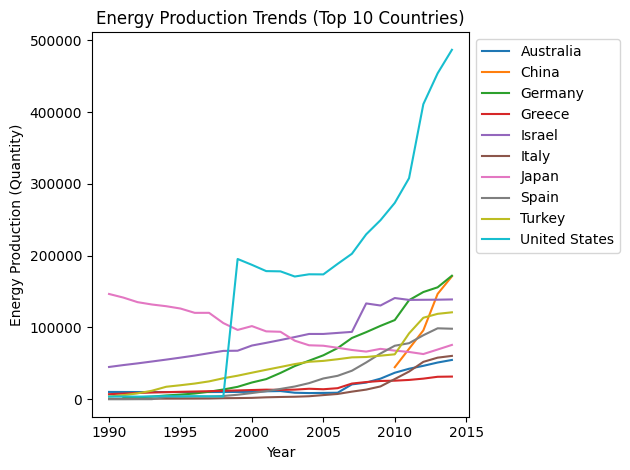

In [ ]:
# Plot trends for wind and solar by country
plt.figure()  # Adjusted figure size for better visibility
for country in df_top_10['country_or_area'].unique():
    country_data = df_top_10[df_top_10['country_or_area'] == country]
    plt.plot(country_data['year'], country_data['quantity'], label=country)

# Adding title and labels
plt.title('Energy Production Trends (Top 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Energy Production (Quantity)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside for clarity

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

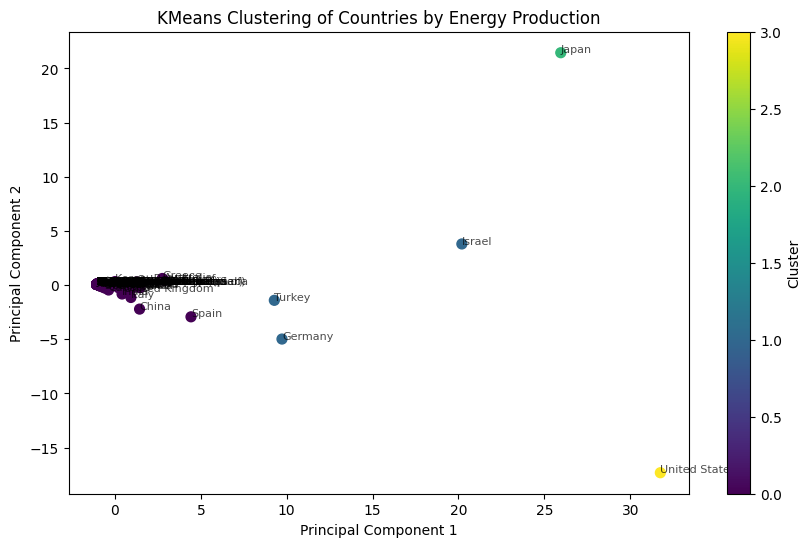

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pivot the data to have countries as rows and years as columns
df_pivot = df_grouped.pivot_table(index='country_or_area', columns='year', values='quantity', fill_value=0)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pivot)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_pivot['Cluster'] = kmeans.fit_predict(df_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))

# Scatter plot using the first two principal components for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_pivot['Cluster'], cmap='viridis', s=50)
plt.title('KMeans Clustering of Countries by Energy Production')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

# Show country labels for better identification
for i, country in enumerate(df_pivot.index):
    plt.annotate(country, (pca_components[i, 0], pca_components[i, 1]), fontsize=8, alpha=0.7)

plt.show()

In [ ]:
# Add a column to display cluster assignments
df_pivot['Cluster'] = kmeans.labels_

# Show countries grouped by clusters
for cluster_num in df_pivot['Cluster'].unique():
    print(f"\nCluster {cluster_num}:")
    countries_in_cluster = df_pivot[df_pivot['Cluster'] == cluster_num].index.tolist()
    print(", ".join(countries_in_cluster))



Cluster 0:
American Samoa, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bangladesh, Belarus, Belgium, Bolivia (Plur. State of), Bonaire, St Eustatius, Saba, Botswana, Brazil, Brunei Darussalam, Bulgaria, Cabo Verde, Cambodia, Canada, Chile, China, Colombia, Costa Rica, Croatia, Curaçao, Cyprus, Czechia, Denmark, Dominican Republic, Ecuador, Egypt, Eritrea, Estonia, Ethiopia, Faeroe Islands, Falkland Is. (Malvinas), Fiji, Finland, France, French Guiana, French Polynesia, Gabon, Georgia, Germany, Fed. R. (former), Greece, Guadeloupe, Guatemala, Honduras, Hungary, Iceland, India, Indonesia, Iran (Islamic Rep. of), Ireland, Italy, Jamaica, Jordan, Kazakhstan, Kenya, Korea, Republic of, Lao People's Dem. Rep., Latvia, Lebanon, Liechtenstein, Lithuania, Luxembourg, Madagascar, Malaysia, Maldives, Malta, Marshall Islands, Martinique, Mauritius, Mayotte, Mexico, Micronesia (Fed. States of), Montenegro, Morocco, Mozambique, Namibia, Nauru, Netherlands, New Caledonia, New Zealand,

In [ ]:
# Create groups for UK, Australia, and Argentina as one group; Germany and Israel as another group
df['country_or_area'] = df['country_or_area'].replace({
    'United Kingdom': 'UK_AUS_ARG', 'Australia': 'UK_AUS_ARG', 'Argentina': 'UK_AUS_ARG',
    'Germany': 'GER_ISR', 'Israel': 'GER_ISR'
})

# Filter data for the selected countries/groups
countries_groups = ['United States', 'Japan', 'UK_AUS_ARG', 'GER_ISR']
filtered_data = df[df['country_or_area'].isin(countries_groups)]

# Group by country/area and category, then sum the quantities
category_totals = filtered_data.groupby(['country_or_area', 'category'])['quantity'].sum().unstack()

# Find the highest category for each country/group
highest_category = category_totals.idxmax(axis=1)

# Display the result
print(highest_category)

country_or_area
GER_ISR                          hard_coal
Japan            natural_gas_including_lng
UK_AUS_ARG                       hard_coal
United States                    hard_coal
dtype: object


In [ ]:
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Ensure that the number of columns in the centroids matches df_pivot
# This line ensures that the centroids are matched with the columns correctly
centroid_df = pd.DataFrame(centroids, columns=df_pivot.columns[:centroids.shape[1]])

# Print the centroids DataFrame
print(centroid_df)


year       1990       1991       1992       1993       1994       1995  \
0     -0.112336  -0.116154  -0.119564  -0.123668  -0.128814  -0.131660   
1      1.096686   1.291437   1.483892   1.695599   1.960271   2.143612   
2     10.939357  10.834678  10.703127  10.572387  10.416096  10.255939   
3      0.149583   0.158681   0.149418   0.170285   0.191288   0.165676   

year       1996      1997      1998      1999  ...      2005      2006  \
0     -0.135727 -0.138866 -0.146007 -0.154383  ... -0.174286 -0.172481   
1      2.388504  2.585605  3.085313  1.797507  ...  3.310062  3.309942   
2     10.016483  9.852761  9.278814  4.689905  ...  3.621134  3.241114   
3      0.191048  0.165257  0.154091  9.678639  ...  8.757325  8.906672   

year      2007      2008      2009      2010      2011      2012      2013  \
0    -0.170035 -0.167932 -0.165051 -0.160059 -0.160156 -0.151137 -0.145403   
1     3.331368  3.474126  3.319829  3.217341  3.342065  2.894597  2.667242   
2     2.854397  2.346555

In [ ]:
print(df['country_or_area'].unique())

['Austria' 'Belgium' 'Czechia' 'Finland' 'France' 'Greece' 'Hungary'
 'Italy' 'Korea, Republic of' 'Netherlands' 'Romania' 'Serbia' 'Slovakia'
 'Ukraine' 'UK_AUS_ARG' 'United States' 'Brunei Darussalam' 'Bulgaria'
 'Canada' 'Chile' 'Croatia' 'Iran (Islamic Rep. of)' 'Jordan' 'Lithuania'
 'Mexico' 'Oman' 'Other Asia' 'Poland' 'Portugal' 'Spain' 'Sweden'
 'Switzerland' 'T.F.Yug.Rep. Macedonia' 'Turkey' 'Uzbekistan' 'Colombia'
 'GER_ISR' 'Norway' 'China, Macao SAR' 'Japan' 'Denmark' 'Ireland'
 'Philippines' 'Bangladesh' 'Eritrea' 'Ethiopia' 'Lesotho' 'Nepal' 'Niger'
 'Pakistan' 'Serbia and Montenegro' 'Tunisia' 'Botswana' 'Georgia'
 'Republic of Moldova' 'Peru' 'South Africa' 'Iceland' 'Latvia'
 'Luxembourg' 'Cuba' 'Kyrgyzstan' 'Singapore' 'Thailand'
 'United Arab Emirates' 'Uruguay' 'Armenia' 'Fiji' "Korea, Dem.Ppl's.Rep."
 'Russian Federation' 'Swaziland' 'Zimbabwe' 'Afghanistan'
 'Antigua and Barbuda' 'Azerbaijan' 'Bahamas' 'Belize'
 'Bolivia (Plur. State of)' 'Brazil' 'Burkina Faso' '

In [ ]:
# Check if 'United Kingdom' column exists
if df.get('United Kingdom') is not None:
    print("Column 'United Kingdom' exists.")
else:
    print("Column 'United Kingdom' does not exist.")

Column 'United Kingdom' does not exist.


<Figure size 1000x600 with 0 Axes>

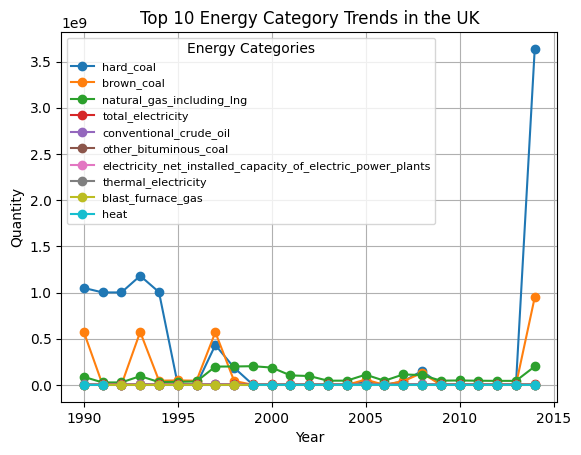

In [ ]:
#Examining UK alone
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the UK
df_uk = df[df['country_or_area'] == 'UK_AUS_ARG']

# Group by year and energy category, summing quantities
df_uk_grouped = df_uk.groupby(['year', 'category'])['quantity'].sum().reset_index()

# Pivot the data for better visualization
df_uk_pivot = df_uk_grouped.pivot(index='year', columns='category', values='quantity')

# Sum across the categories and select the top 10 categories based on total quantity
top_10_categories = df_uk_pivot.sum(axis=0).nlargest(10).index

# Filter the pivot data to include only the top 10 categories
df_uk_top10 = df_uk_pivot[top_10_categories]

# Plot trends for each top energy category
plt.figure(figsize=(10, 6))
df_uk_top10.plot(kind='line', marker='o')
plt.title('Top 10 Energy Category Trends in the UK')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.legend(title='Energy Categories',fontsize=8)
plt.grid(True)
plt.show()

In [ ]:
# Check for missing values
df.isnull().sum()

#to ensure quantity footnotes is not used or removed

,0
country_or_area,0
commodity_transaction,0
year,0
unit,0
quantity,0
quantity_footnotes,1025536
category,0


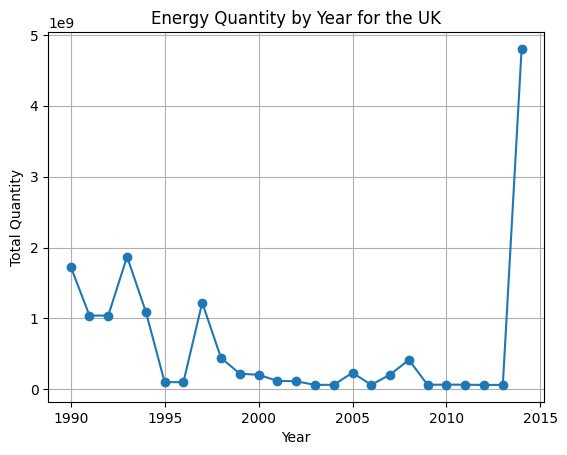

In [ ]:
# Check for anomalies in quantity values
df_uk = df[df['country_or_area'] == 'UK_AUS_ARG']
df_uk.groupby('year')['quantity'].sum().plot(kind='line', marker='o')
plt.title('Energy Quantity by Year for the UK')
plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()

In [ ]:
print(df['category'].value_counts())

category
total_electricity                  133916
gas_oil_diesel_oil                  97645
fuel_oil                            75132
natural_gas_including_lng           64161
liquified_petroleum_gas             62156
                                    ...  
uranium                               684
geothermal                            496
gas_coke                              365
other_coal_products                   105
tide_wave_and_ocean_electricity        58
Name: count, Length: 71, dtype: int64
